# Import librabies

In [7]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [20]:
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix ,roc_auc_score ,roc_curve

# Import and preprocessing

In [10]:
train_features = pd.read_csv("C:/Users/koush/Downloads/dataset and all/training_set_features.csv")
test_features = pd.read_csv("C:/Users/koush/Downloads/dataset and all/test_set_features.csv")
train_results = pd.read_csv("C:/Users/koush/Downloads/dataset and all/training_set_labels.csv")

# setting id as index
train_features.set_index('respondent_id', inplace=True)
test_features.set_index('respondent_id', inplace=True)
train_results.set_index('respondent_id', inplace=True)

# Check the indices and shapes
print(train_features.index.equals(train_results.index)) ## this returns TRUE if indexes matches
print(train_features.shape, test_features.shape, train_results.shape)

True
(26707, 35) (26708, 35) (26707, 2)


<Axes: ylabel='respondent_id'>

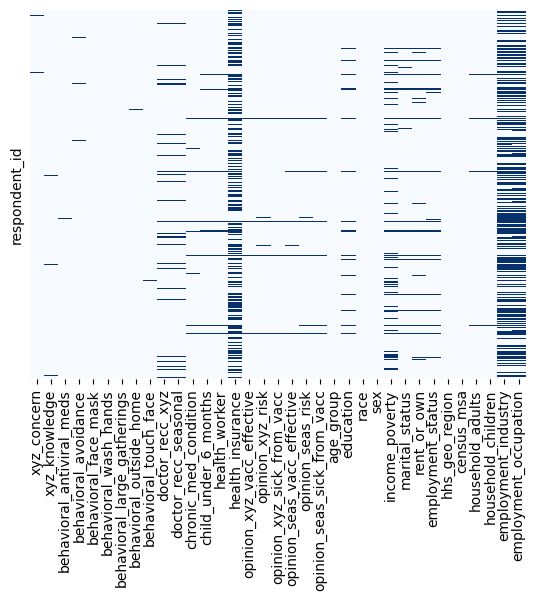

In [11]:
sns.heatmap(train_features.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels = train_features.columns)

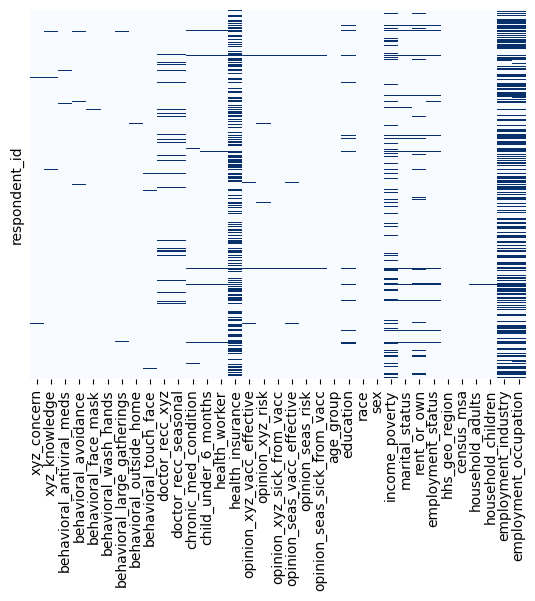

In [12]:
sns.heatmap(test_features.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels = test_features.columns);

In [13]:
cat_cols = [items for items in train_features.columns if train_features[items].dtype =='O']
int_cols = [items for items in train_features.columns if items not in cat_cols ]



int_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),   # fills NaN with mean of the remaining data
    ('scaler', StandardScaler())                   # Standardize data
])

cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),             #fills the NaN with mode of the remaining data
    ('onehot', OneHotEncoder(handle_unknown ='ignore', sparse_output =False))  # One Hot Encoding
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', int_pipe, int_cols),
        ('cat', cat_pipe, cat_cols)
    ],
    remainder='passthrough'  
)

In [14]:
# Preprocess the training and testing data
X_train_preprocessed = preprocessor.fit_transform(train_features)
X_test_preprocessed = preprocessor.transform(test_features)

# Ensure that no samples are dropped
print(X_train_preprocessed.shape, X_test_preprocessed.shape)

(26707, 105) (26708, 105)


# Split Data and Common Functions

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_train_preprocessed, train_results , test_size=0.2, random_state=42)

In [52]:
#ploting Graph
def plot_roc(y_true, y_score):
    fpr, tpr, thresholds = roc_curve(y_test['xyz_vaccine'],y_test_proba[:,0] )
    plt.plot([0, 1], [0, 1], linestyle='--')
    
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False positive rate')
    plt.ylabel('Sensitivity/ Recall')
    roc1 = roc_auc_score( y_true['xyz_vaccine'] ,y_score[:,0])
    print(f'the roc_auc for xyz_vaccine is : {roc1}')
    # show the plot
    plt.show()
    
    fpr2, tpr2, thresholds2 = roc_curve(y_test['seasonal_vaccine'],y_test_proba[:,1] )
    plt.plot([0, 1], [0, 1], linestyle='--')
    
    # plot the roc curve for the model
    plt.plot(fpr2, tpr2, marker='.')
    plt.xlabel('False positive rate')
    plt.ylabel('Sensitivity/ Recall')
    roc2 = roc_auc_score( y_true['seasonal_vaccine'] ,y_score[:,1])
    print(f'the roc_auc for seasonal_vaccine is : {roc2}')
    # show the plot
    plt.show()

In [17]:
def metrics(ytest,ytestpred, ytestproba):
    print('the roc_auc of xyz_vaccine is :', roc_auc_score( ytest['xyz_vaccine'] ,ytestproba[:,0]))
    
    print('\nthe roc_auc of seasonal_vaccine is :', roc_auc_score( ytest['seasonal_vaccine'] ,ytestproba[:,1]))
    
    print('\nthe precision of xyz_vaccine is :', precision_score( ytest['xyz_vaccine'] ,ytestpred[:,0]))
    
    print('\nthe precision of seasonal_vaccine is :', roc_auc_score( ytest['seasonal_vaccine'] ,ytestpred[:,1]))
    
    print('\nthe recall of xyz_vaccine is :', recall_score( ytest['xyz_vaccine'] ,ytestpred[:,0]))
    
    print('\nthe recall of seasonal_vaccine is :', recall_score( ytest['seasonal_vaccine'] ,ytestpred[:,1]))
    
    print('\nthe CM of xyz_vaccine is :\n', confusion_matrix( ytest['xyz_vaccine'] ,ytestpred[:,0]))
    
    print('\nthe CM of seasonal_vaccine is :\n', confusion_matrix( ytest['seasonal_vaccine'] ,ytestpred[:,1]))

# Observations via different algo

## Random Forest

In [18]:
randforest = RandomForestClassifier(n_estimators=100, random_state=42)
multi_output  = MultiOutputClassifier(randforest, n_jobs=-1)

# Train the model
multi_output.fit(X_train, y_train)

y_test_proba = multi_output.predict_proba(X_test)
y_test_pred = multi_output.predict(X_test)

# Convert the list of arrays into a 2D array
y_test_proba = np.array(y_test_proba)[:, :, 1].T

metrics(y_test,y_test_pred,y_test_proba)



the roc_auc of xyz_vaccine is : 0.8639554916841052

the roc_auc of seasonal_vaccine is : 0.8570449153459695

the precision of xyz_vaccine is : 0.7855973813420621

the precision of seasonal_vaccine is : 0.7812098098165059

the recall of xyz_vaccine is : 0.4247787610619469

the recall of seasonal_vaccine is : 0.7498980008159934

the CM of xyz_vaccine is :
 [[4081  131]
 [ 650  480]]

the CM of seasonal_vaccine is :
 [[2349  542]
 [ 613 1838]]


the roc_auc for xyz_vaccine is : 0.8639554916841052


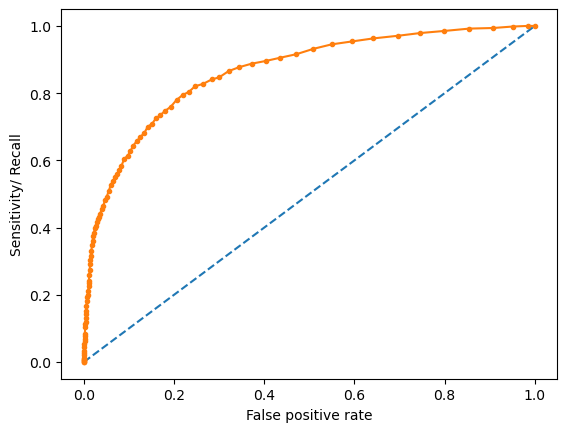

the roc_auc for seasonal_vaccine is : 0.8570449153459695


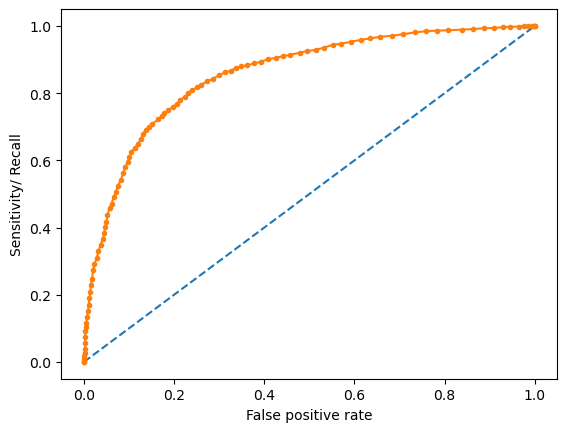

In [51]:
plot_roc(y_test,y_test_proba)

## Gaussian

In [50]:
multiNB = GaussianNB()
multi_output2  = MultiOutputClassifier(multiNB, n_jobs=-1)

# Train the model
multi_output2.fit(X_train, y_train)

y_test_proba2 = multi_output2.predict_proba(X_test)
y_test_pred2 = multi_output2.predict(X_test)

# Convert the list of arrays into a 2D array
y_test_proba2 = np.array(y_test_proba2)[:, :, 1].T
metrics(y_test, y_test_pred2 ,y_test_proba2)


the roc_auc of xyz_vaccine is : 0.7090353940280194

the roc_auc of seasonal_vaccine is : 0.7410059017694584

the precision of xyz_vaccine is : 0.3392698130008905

the precision of seasonal_vaccine is : 0.6609473032206057

the recall of xyz_vaccine is : 0.6743362831858407

the recall of seasonal_vaccine is : 0.7649938800489596

the CM of xyz_vaccine is :
 [[2728 1484]
 [ 368  762]]

the CM of seasonal_vaccine is :
 [[1610 1281]
 [ 576 1875]]


the roc_auc for xyz_vaccine is : 0.7090353940280194


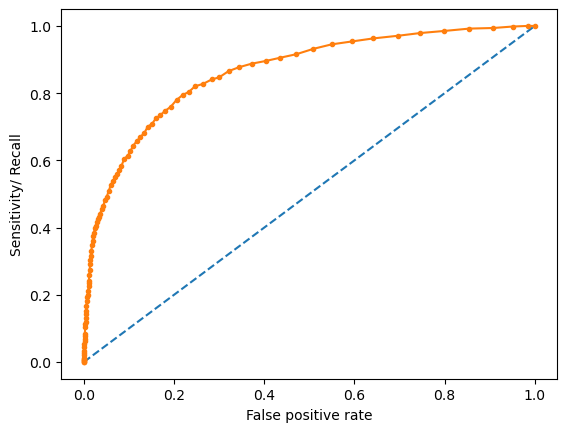

the roc_auc for seasonal_vaccine is : 0.7410059017694584


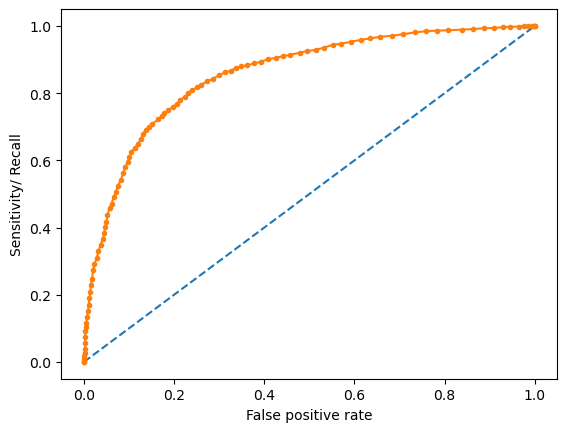

In [58]:
plot_roc(y_test,y_test_proba2)

## Logistics

In [53]:
log = LogisticRegression()
multi_output3  = MultiOutputClassifier(log, n_jobs=-1)

# Train the model
multi_output3.fit(X_train, y_train)

y_test_proba3 = multi_output3.predict_proba(X_test)
y_test_pred3 = multi_output3.predict(X_test)

# Convert the list of arrays into a 2D array
y_test_proba3 = np.array(y_test_proba3)[:, :, 1].T
metrics(y_test, y_test_pred3 ,y_test_proba3)

the roc_auc of xyz_vaccine is : 0.8343498138483391

the roc_auc of seasonal_vaccine is : 0.8564368012209136

the precision of xyz_vaccine is : 0.6995708154506438

the precision of seasonal_vaccine is : 0.7835556852037747

the recall of xyz_vaccine is : 0.4327433628318584

the recall of seasonal_vaccine is : 0.7466340269277846

the CM of xyz_vaccine is :
 [[4002  210]
 [ 641  489]]

the CM of seasonal_vaccine is :
 [[2372  519]
 [ 621 1830]]


the roc_auc for xyz_vaccine is : 0.8343498138483391


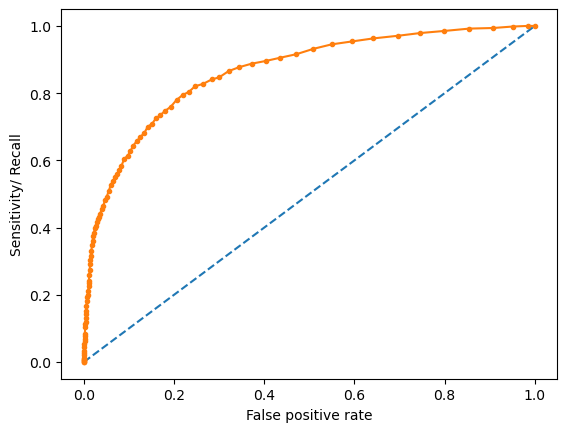

the roc_auc for seasonal_vaccine is : 0.8564368012209136


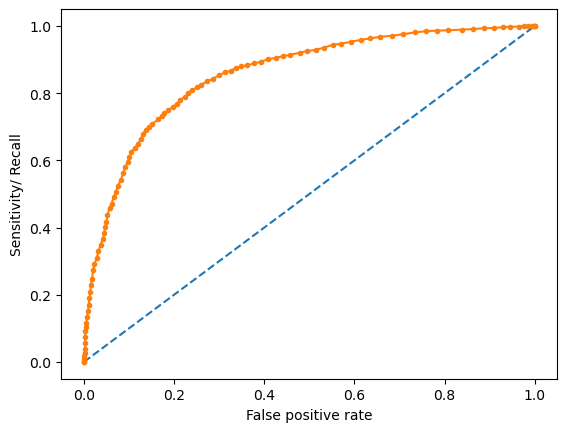

In [54]:
plot_roc(y_test,y_test_proba3)

# finding out best model

Its seems Random forest is the better alogrithm here

In [55]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=2)

# Wrap the model with MultiOutputClassifier
multi_output = MultiOutputClassifier(rf_model, n_jobs=2)

# Define the parameter grid
param_grid = {
    'estimator__n_estimators': [50, 100],
    'estimator__max_depth': [None, 10],
    'estimator__min_samples_split': [2, 5],
    'estimator__min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV with limited n_jobs
grid_search = GridSearchCV(multi_output, param_grid, cv=3, scoring='roc_auc', n_jobs=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best parameters: {best_params}')
print(f'Best ROC AUC score from GridSearchCV: {best_score}')

Best parameters: {'estimator__max_depth': None, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 100}
Best ROC AUC score from GridSearchCV: 0.8556272517047927


# Preparing submission file

In [56]:
# best model
best_algo  = grid_search.best_estimator_


Y_test_proba = best_algo.predict_proba(X_test_preprocessed)
Y_test_proba = np.array(Y_test_proba)[:, :, 1].T

# Prepare the submission file
submission = pd.DataFrame({
    'respondent_id': test_features.index,
    'xyz_vaccine': Y_test_proba[:, 0],
    'seasonal_vaccine': Y_test_proba[:, 1]
})

submission.to_csv('submission_final.csv', index=False)
print(submission.head())

   respondent_id  xyz_vaccine  seasonal_vaccine
0          26707     0.199277          0.394498
1          26708     0.040405          0.053210
2          26709     0.270790          0.707270
3          26710     0.545662          0.893416
4          26711     0.258517          0.505339


In [57]:
boo = pd.read_csv('C:/Users/koush/Downloads/dataset and all/submission_final.csv')
boo

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.199277,0.394498
1,26708,0.040405,0.053210
2,26709,0.270790,0.707270
3,26710,0.545662,0.893416
4,26711,0.258517,0.505339
...,...,...,...
26703,53410,0.230666,0.386106
26704,53411,0.219040,0.259150
26705,53412,0.137742,0.313828
26706,53413,0.097017,0.379440
